C:\Users\dalma\AppData\Local\Temp\ipykernel_9004\2138497718.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logloss[logloss > 5 * third_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_9004\2138497718.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logloss[logloss > 5 * third_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_9004\2138497718.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logloss[

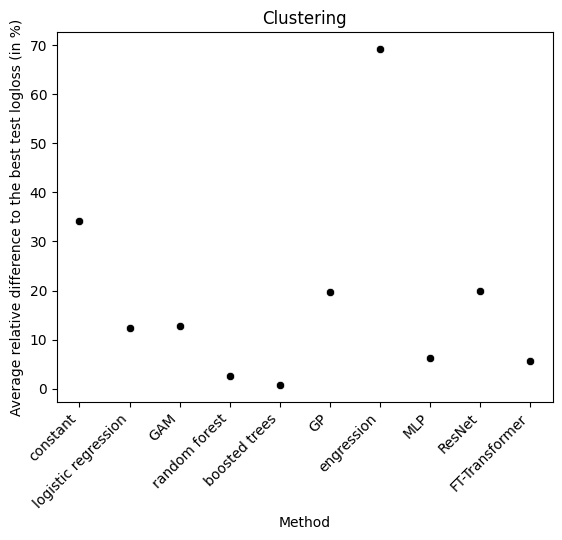

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import numpy as np

directory = r'RESULTS/K_MEDOIDS'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_k_medoids_logloss')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        logloss = table['Log Loss']
        third_largest = sorted(logloss[np.isnan(logloss)==0], reverse=True)[2]
        logloss[logloss > 5 * third_largest] = np.nan
        lowest_logloss = np.nanmin(logloss)
        df[task_name] = (logloss - lowest_logloss) / lowest_logloss

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'logistic_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'logistic_regression': 'logistic regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test logloss (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Clustering')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure

# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/k_medoids_logloss_num_and_cat_features_relative_differences.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

C:\Users\dalma\AppData\Local\Temp\ipykernel_9004\1235677800.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logloss[logloss > 5 * third_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_9004\1235677800.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logloss[logloss > 5 * third_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_9004\1235677800.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logloss[

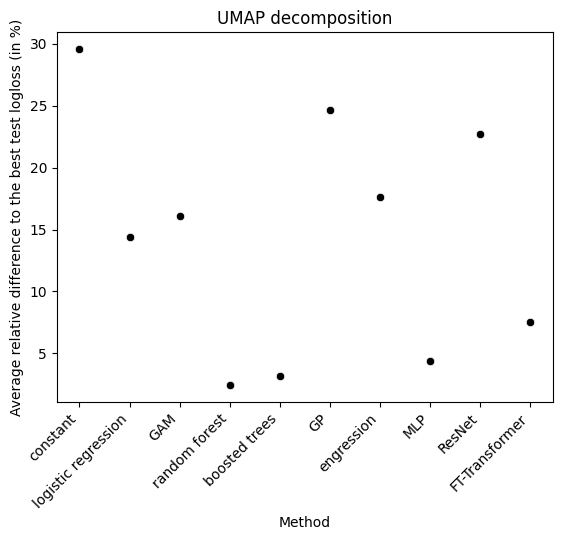

In [2]:
import os
import pandas as pd

directory = r'RESULTS/UMAP_DECOMPOSITION'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_umap_decomposition_logloss')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)      
        logloss = table['Log Loss']
        third_largest = sorted(logloss[np.isnan(logloss)==0], reverse=True)[2]
        logloss[logloss > 5 * third_largest] = np.nan
        lowest_logloss = np.nanmin(logloss)
        df[task_name] = (logloss - lowest_logloss) / lowest_logloss

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'logistic_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'logistic_regression': 'logistic regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test logloss (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('UMAP decomposition')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/umap_decomposition_logloss_num_and_cat_features_relative_differences.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

C:\Users\dalma\AppData\Local\Temp\ipykernel_9004\3383236509.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logloss[logloss > 5 * third_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_9004\3383236509.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logloss[logloss > 5 * third_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_9004\3383236509.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logloss[

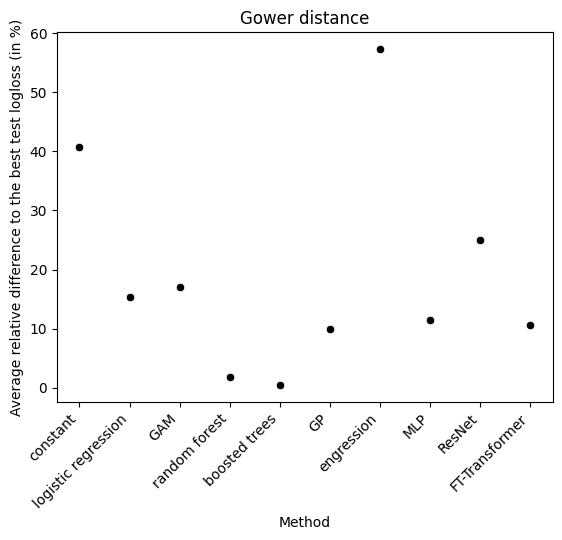

In [3]:
import os
import pandas as pd

directory = r'RESULTS/GOWER'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_gower_logloss')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        logloss = table['Log Loss']
        third_largest = sorted(logloss[np.isnan(logloss)==0], reverse=True)[2]
        logloss[logloss > 5 * third_largest] = np.nan
        lowest_logloss = np.nanmin(logloss)
        df[task_name] = (logloss - lowest_logloss) / lowest_logloss

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'logistic_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'logistic_regression': 'logistic regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test logloss (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Gower distance')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/gower_logloss_num_and_cat_features_relative_differences.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

C:\Users\dalma\AppData\Local\Temp\ipykernel_9004\3897556295.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logloss[logloss > 5 * third_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_9004\3897556295.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logloss[logloss > 5 * third_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_9004\3897556295.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logloss[

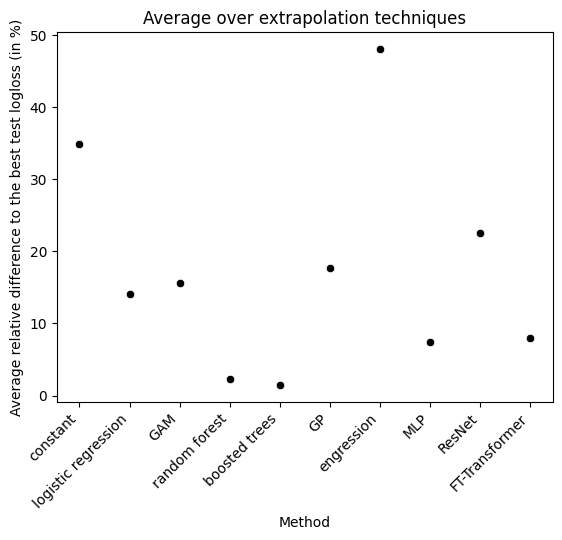

In [4]:
# Plotting the average test accuracy for all extrapolation methods
import os
import pandas as pd
import seaborn as sns

list_directories = [r'RESULTS/K_MEDOIDS', r'RESULTS/UMAP_DECOMPOSITION', r'RESULTS/GOWER']
df = pd.DataFrame()

for directory in list_directories:
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            task_name = filename
            filepath = os.path.join(directory, filename)
            table = pd.read_csv(filepath) 
            logloss = table['Log Loss']
            third_largest = sorted(logloss[np.isnan(logloss)==0], reverse=True)[2]
            logloss[logloss > 5 * third_largest] = np.nan
            lowest_logloss = np.nanmin(logloss)
            df[task_name] = (logloss - lowest_logloss) / lowest_logloss

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'logistic_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'logistic_regression': 'logistic regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test logloss (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Average over extrapolation techniques')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/average_over_extrapolation_techniques_logloss_num_and_cat_features_relative_differences.png',bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()